# Import necessary libraries

In [13]:
#import all the libraries and dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

## Retrieve the Data



In [14]:
# Import scaled earthquake data
df = pd.read_csv('Resources/earthquake_data_standardized.csv')
df.head()

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt,mmi_class
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255,2
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791,0
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360,0
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169,0
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550,1


### Create X and Y 

In [15]:
# Define features and target
X = df.drop(columns='mmi_class', axis=1)
y = df['mmi_class']
display(X.head())
display(y[:5])

,longitude,latitude,depth,magnitude,number_stations,min_station_distance,nodal_plane_1_dip,nodal_plane_1_rake,nodal_plane_1_strike,nodal_plane_2_dip,...,t_axis_length,t_axis_plunge,percent_double_couple,scalar_moment,tensor_mpp,tensor_mrp,tensor_mrr,tensor_mrt,tensor_mtp,tensor_mtt
0,-0.858789,0.217395,-0.138401,1.259068,-0.162005,-0.621166,0.764993,0.856091,-0.187953,-3.275980,...,-0.059860,3.288087,-0.131701,-0.058242,-0.053888,-0.019118,-0.003759,-0.020843,-0.042471,0.055255
1,-1.586411,1.453026,2.957343,0.278647,-0.799719,0.182939,-0.322804,-1.396320,-0.143028,0.718901,...,-0.066207,0.813702,-0.016844,-0.065891,-0.050703,-0.004675,-0.031174,-0.034918,-0.064978,0.059791
2,-0.451425,1.705352,1.297980,0.866900,-0.368324,2.000126,-0.866703,-0.789901,-0.187953,-1.531736,...,-0.062811,-0.542928,-0.045558,-0.062687,-0.048152,0.025176,-0.045815,-0.028006,-0.074322,0.061360
3,-0.891745,0.639950,-0.776489,0.808074,-0.405837,-0.566141,-0.594754,-0.010221,0.620696,0.775167,...,-0.062760,-0.274021,-0.138879,-0.063113,-0.047294,-0.015576,-0.037577,-0.028875,-0.058419,0.058169
4,0.049063,0.917870,-0.567035,0.866900,1.919944,1.537912,-0.594754,-1.396320,1.564120,0.775167,...,-0.062428,-0.128764,-0.009665,-0.062141,-0.048454,0.008477,-0.034790,-0.019123,-0.052158,0.058550


0    2
1    0
2    0
3    0
4    1
Name: mmi_class, dtype: int64

### Split the Data 

In [16]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#### Initialize and Fit the Model

In [17]:
# Initialize the model
logreg = LogisticRegression()

# Train the model
logreg.fit(X_train, y_train)

LogisticRegression()

In [18]:
# Make predictions
y_pred = logreg.predict(X_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.6006944444444444


In [20]:
# Classification report and Model Evaluation

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', cm)

Confusion Matrix:
 [[81 29  4]
 [30 51 13]
 [ 8 31 41]]


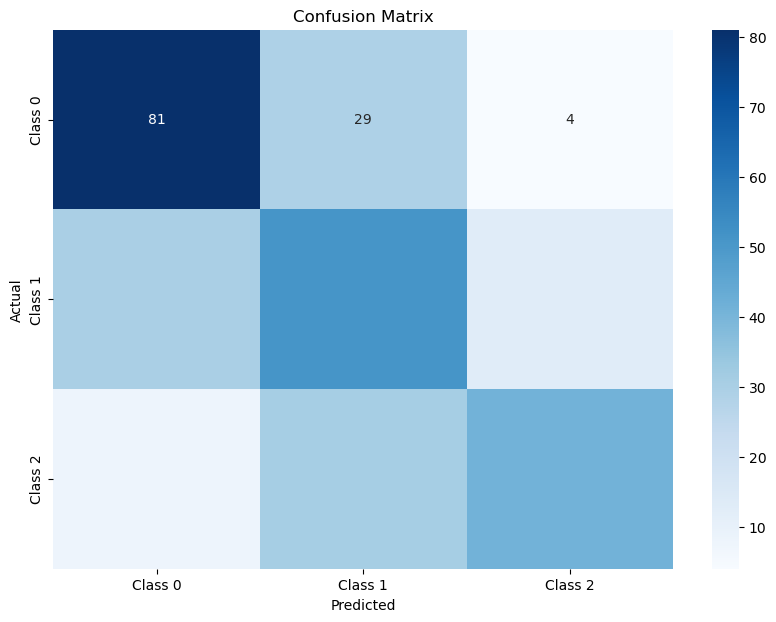

In [21]:
# y_test and y_pred are defined
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1', 'Class 2'], yticklabels=['Class 0', 'Class 1', 'Class 2'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Data transformation

## Predict Model Performance



*Replace the text in this markdown cell with your predictions, and be sure to provide justification for your guess.*

## Split the Data into Training and Testing Sets

In [22]:
# Split the data into training and testing datasets by using train_test_split.
# Split the data into X_train, X_test, y_train, y_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

## Scale the Features

Use the `StandardScaler` to scale the features data. Remember that only `X_train` and `X_test` DataFrames should be scaled.

In [23]:
# Create the StandardScaler instance
scaler = StandardScaler()

NameError: name 'StandardScaler' is not defined

In [ ]:
# Fit the Standard Scaler with the training data
scaler.fit(X_train)

StandardScaler()

In [ ]:
# Scale the training and testing features DataFrames using the transform function
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train and evaluate model

## Create and Fit a Logistic Regression Model

Create a Logistic Regression model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [ ]:
# Train a Logistic Regression model and print the model score
# Fit a logistic regression model by using the scaled training data (X_train_scaled and y_train). Set the random_state argument to 1.

# Create a logistic regression model
logistical_regression = LogisticRegression()

# Create a logistic regression model with random_state set for reproducibility
logistic_regression = LogisticRegression(random_state=1)

# Train the model on the scaled training data
logistical_regression.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test data
model_score = logistical_regression.score(X_test_scaled, y_test)

# Make predictions using the test data
predictions_test = logistical_regression.predict(X_test_scaled)

# Print the model score
print("Logistic Regression Model Score: ", model_score)


NameError: name 'X_train_scaled' is not defined

In [ ]:
#Convert the predictions to a DataFrame

#Print the predictions


In [ ]:
# Make and save testing predictions with the saved logistic regression model using the scaled test data
predictions = logistical_regression.predict(X_test_scaled)
# Review the predictions
print(predictions[:10])

[0 0 1 0 0 1 1 0 1 1]


In [ ]:
# Print the first 10 predictions alongside the actual labels
# Reset index of y_test for proper alignment



In [ ]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.


## Create and Fit a Random Forest Classifier Model

Create a Random Forest Classifier model, fit it to the training data, make predictions with the testing data, and print the model's accuracy score. You may choose any starting settings you like. 

In [ ]:
# Train a Random Forest Classifier model and print the model score


In [ ]:
# Make and save testing predictions with the saved logistic regression model using the test data


In [ ]:
# Calculate the accuracy score by evaluating `y_test` vs. `testing_predictions`.


In [ ]:
# Add some text for labels, title and custom x-axis tick labels, etc.


## Evaluate the Models

Which model performed better? How does that compare to your prediction? Write down your results and thoughts in the following markdown cell.

*Replace the text in this markdown cell with your answers to these questions.*